# 1. import libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = 10,5

---
# 2. import dataset

In [4]:
df = pd.read_csv('parkinsons.csv')
df.shape

(756, 755)

In [5]:
df1 = df.drop('class', axis=1)
scaler = MinMaxScaler()
df2 = pd.DataFrame(scaler.fit_transform(df1))
df2.shape

(756, 754)

---
# 3. pca

In [6]:
model = PCA(random_state=42).fit(df2)

Text(0, 0.5, 'variance')

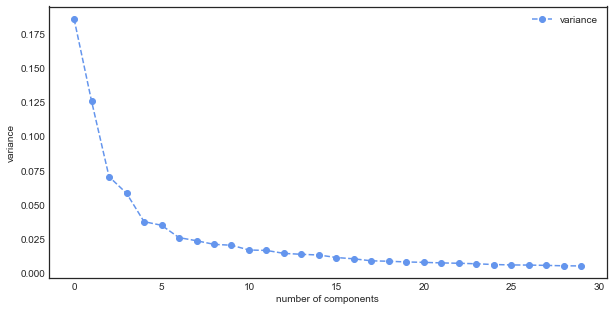

In [7]:
plt.plot(model.explained_variance_ratio_[0:30], linestyle='--', marker='o', color='cornflowerblue', label = 'variance')
plt.legend(loc = 'best')
plt.xlabel('number of components')
plt.ylabel('variance')

---
# 4. export dataset

In [8]:
model = PCA(n_components=10, random_state = 42).fit(df2)
components = model.transform(df2)
components = pd.DataFrame(components, columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10'])

In [9]:
df3 = pd.concat([components, df], axis = 1)
df3['Classification'] = df3['class']
df3 = df3[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'Classification']]
df3.to_csv('clean.csv', index=False)
df3.shape

(756, 11)